# Проект - принятие решений в бизнесе

**Описание проекта**

Контекст

*Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.*

# Часть 1. Приоритизация гипотез.

**В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.**

**Задача:**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Знакомство с данными. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('F:\obuchenie\csv\hypothesis.csv')
    orders = pd.read_csv('F:\obuchenie\csv\orders.csv')
    visitors = pd.read_csv('F:\obuchenie\csv\visitors.csv')

In [3]:
pd.set_option('display.max_colwidth', False) #строчки полностью отображаются

In [4]:
list_ = [hypothesis, orders, visitors]
for i in list_:
    display(i.head())
    print(i.info())
    print('-'* 50)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
--------------------------------------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
--------------------------------------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
--------------------------------------------------


## Предобработка данных

**На данном этапе нужно привести все названия столбцов к нижнему реестру а так же необходимо перевести некоторые данные к нужному типу.**

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Проверка на пропуски значений.**

In [7]:
list_ = [hypothesis, orders, visitors]
for i in list_:
    display(i.isnull().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

**Пропусков в данных нет.**

**Проверим на наличие дубликатов.**

In [8]:
list_ = [hypothesis, orders, visitors]
for i in list_:
    display(i.duplicated().sum())

0

0

0

**В данных нет дубликатов.**

**Данные с датами необходимо привести в нужный формат.**

In [9]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [10]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [11]:
table = visitors.groupby('group', as_index=False).agg({'visitors': 'sum'})

print(table)

difference = round(100 - (table.loc[0, 'visitors'] / table.loc[1, 'visitors']*100), 2)
print()
print("В данных две группы А и В")
print()
print(f'Разница между группами составляет: {difference} %')
#нужно помнить о 80/20 и закончить основное, вернусь как сделаю обязательное

  group  visitors
0  A     18736   
1  B     18916   

В данных две группы А и В

Разница между группами составляет: 0.95 %


**Данные обработаны, можно приступать к первому заданию.**

**В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.**

**Задача:**

- [x] Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [x] Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [x] Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Посмотрим на сами гипотезы.**

In [12]:
display(hypothesis['hypothesis'].unique())

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

## Методы приоритизации гипотез ICE и RICE.

In [13]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Вспомним что фреймворк RICE состоит из четырёх компонент:**
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

In [14]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
print(round(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False), 2))

                                                                                                     hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстр

In [15]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

**Видно что изменились приоритеты в порядке гипотез после применения метода RICE, т.к. в числителе появился важный параметр Reach, который учитывает на какое кол-во пользователей повлияет гипотеза. После применения метода заметим что основные приоритеты поменялись:**

In [16]:
rating_ice = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
rating_ice = rating_ice['hypothesis'].head(3).unique()
print('Приоритет гипотез методом ICE:')
print(rating_ice)

Приоритет гипотез методом ICE:
['Запустить акцию, дающую скидку на товар в день рождения'
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок']


In [17]:
rating_rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
rating_rice = rating_rice['hypothesis'].head(4).unique()
print('Приоритет гипотез методом RICE:')
print(rating_rice)

Приоритет гипотез методом RICE:
['Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию']


**Применив метод ICE топовых гипотез было 3, но использовав метод RICE топ гипотез стало 4 и они изменились в зависимости от влияния на количество пользователей.**

# Часть 2. Анализ A/B-теста

**Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.**

**Задача**

**Проанализируйте A/B-тест:**

- [x] Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- [x] Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- [x] Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- [x] Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- [x] Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- [x] Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- [x] Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- [x] Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- [x] Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- [x] Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- [x] Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x] Примите решение по результатам теста и объясните его. 
   Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

### График кумулятивной выручки по группам.

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [19]:
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [20]:
#Агрегируем значения.
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [22]:
#Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [23]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


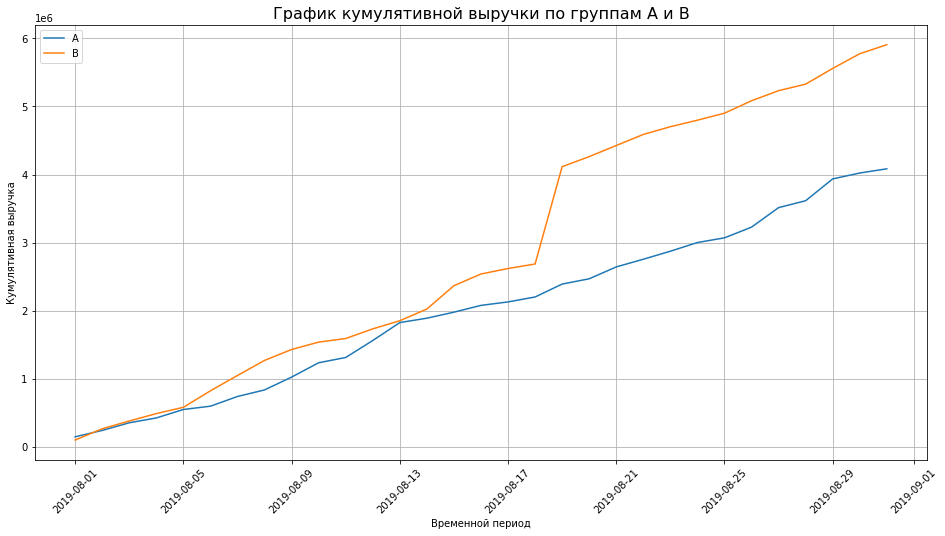

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

plt.figure(figsize=(16, 8))
plt.title("График кумулятивной выручки по группам А и В", fontsize=16)
plt.xlabel("Временной период")
plt.ylabel("Кумулятивная выручка")
plt.xticks(rotation = 45)

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.grid(True)
plt.show()

**Выводы по графику кумулятивной выручки группы А и В:**
- Выручка была примерно одинакова до 5 августа, затем виден рост группы В относительно группы А.
- Далее 13 числа рост выручки по группе В возрастает сильнее предыдущего скачка.
- 19 августа произошло событие (возможно сделали скидки или распродажу), которое резко увеличило выручку группы В. Данное событие никак не отразилось на группе А. 
- После скачка 19 августа выручка группы В стабилизировалась, но осталась на очень высоком уровне относительно группы А.
- Группа А проявляет стабильность относительно группы В на протяжении всего времени, исключая небольшой скачек 13 августа, когда выручка групп сравнялась и небольшой просадки в начале относительно группы В.

### График кумулятивного среднего чека по группам. 

**Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:**

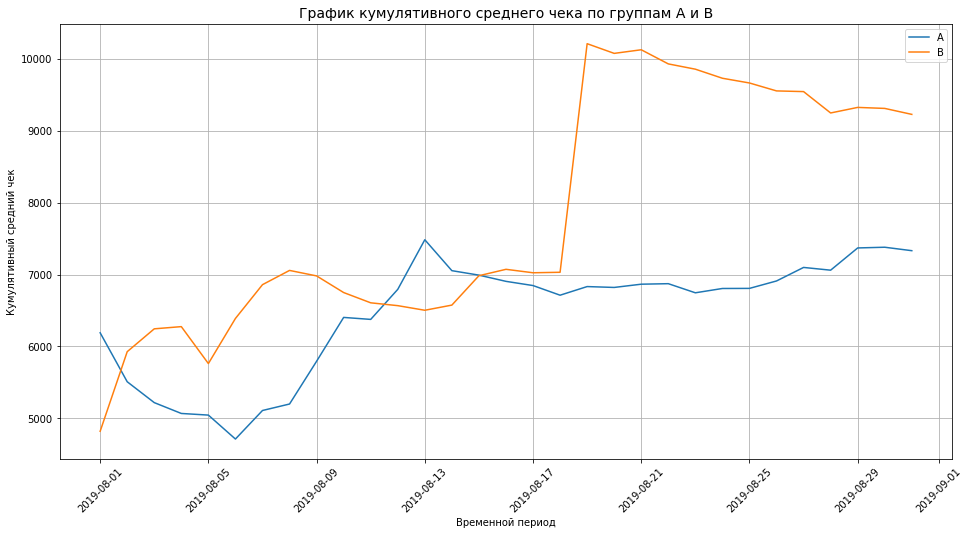

In [26]:
plt.figure(figsize=(16, 8))
plt.title("График кумулятивного среднего чека по группам А и В", fontsize=14)
plt.xlabel("Временной период")
plt.ylabel("Кумулятивный средний чек")
plt.xticks(rotation = 45)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend() 
plt.grid(True)
plt.show()

**Выводы по графику кумулятивного среднего чека по группам:**
- Из графика заметим что средний чек по группе В был всегда выше чем средний чек группы А.
- Наблюдается просадка среднего чека по обеим группам 5-6 числа.
- Следует заметить что группа А стартовала с более высокого среднего чем группа В.
- 6 августа был самый низкий средний чек по группе А, а 14 самый высокий. После 14 числа идет стабилизация среднего чека по группе А.
- Наблюдаем всплеск 19 числа по группе В, в данные попали очень крупные заказы.
- После 19 числа оба графика стабилизируются, но средний чек группы А постепенно растет, а группы В постепенно снижается.
- Если по группе А все более-менее стабильно, то по группе В явно нужно больше данных чтобы увидеть настоящий средний чек данной группы.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

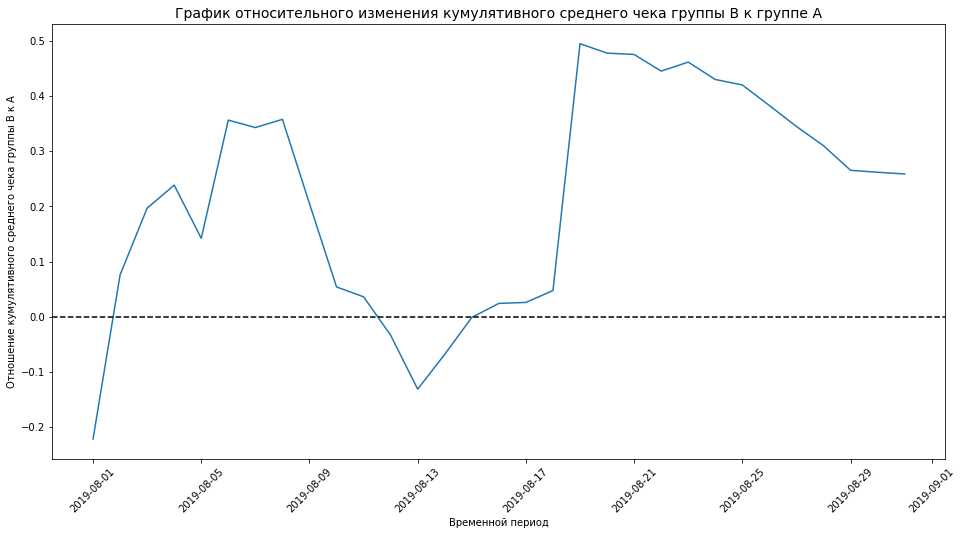

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 8))
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A", fontsize=14)
plt.xlabel("Временной период")
plt.ylabel("Отношение кумулятивного среднего чека группы В к А")
plt.xticks(rotation = 45)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.show()

**Вывод по  графику относительного изменения кумулятивного среднего чека группы B к группе A:**
- 3 раза средний чек обеих групп был одинаков.
- В начале периодна разница ср. чеков была отрицательна, одна группа стартовала с высокого среднего, другая с низкого.
- Далее видим что разница средних чеков была положительна, просадка наблюдается 6 числа и затем просадка после 10го в отрицательную разницу.
- 15 числа разница снова стала положительной и 19 числа резкий рост графика с разницей в 50%.
- После 25 наблюдаем спад графика и к концу периода он стабилизируется на пару дней.
- Данный график говорит о большом разбросе средних чеков и как следствие недостаточности данных.

### График кумулятивного среднего количества заказов на посетителя по группам.

**Построим графики среднего количесва заказов по группам — разделим кумулятивное кол-во заказов на кумулятивное число посетителей:**

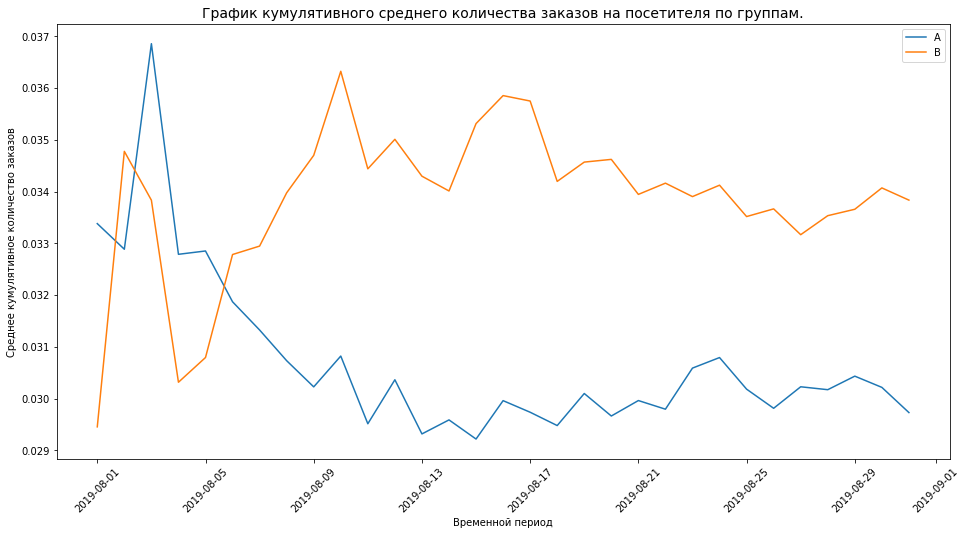

In [28]:
plt.figure(figsize=(16, 8))
plt.title("График кумулятивного среднего количества заказов на посетителя по группам.", fontsize=14)
plt.xlabel("Временной период")
plt.ylabel("Среднее кумулятивное количество заказов")
plt.xticks(rotation = 45)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')

plt.legend() 

plt.show()

**Вывод по графику кумулятивного среднего количества заказов на посетителя по группам:**
- Группа В стартовала с низкого кол-ва заказов на посетителя, в то время как в группе А посетители сразу делали больше заказов.
- Резкий рост заказов/пользователей наблюдаем у обоих групп с 1 по 3 число, затем спад обоих графиков. Но если график А продолжил падать до самого конца периода, то график группы В вновь вырос после 4го и больше резких снижений не было.
- После 9го августа оба графика стабилизировались: график А на низкой планке, график В на высокой.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

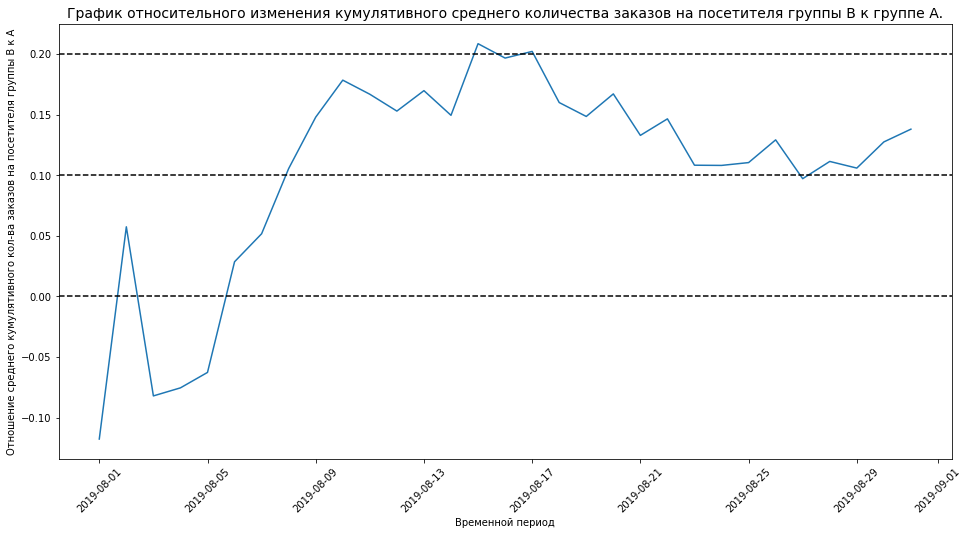

In [29]:
plt.figure(figsize=(16, 8))
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.", fontsize=14)
plt.xlabel("Временной период")
plt.ylabel("Отношение среднего кумулятивного кол-ва заказов на посетителя группы В к А")
plt.xticks(rotation = 45)

# cтроим отношение
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')
plt.show()

**Вывод по графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:**
- 1 августа разница заказы/пользователи была отрицательна, затем график вышел в положительную разницу и 3го числа снова упал.
- После 5го числа наблюдаем рост в разнице группы В к группе А и после 6 го числа разница становиться только положительной.
- Резких скачнов не наблюдается и разница остается только положетельной относительно всего оставшегося периода.

### Точечный график количества заказов по пользователям.

**Подсчитаем количество заказов по пользователям.**

In [30]:
ordersByUsers = (orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


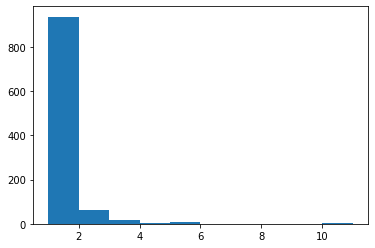

In [31]:
plt.hist(ordersByUsers['orders']) 
plt.show()

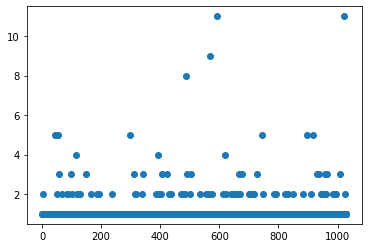

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.show()

**Вывод по точечному графику количества заказов по пользователям:**
- Большинство покупателей заказывали только один раз.
- Есть пользователи которые сделали 8,9 и 11 заказов. Это определенно выброс.
- Много пользователей сделали от 2 до 3 заказов.
- Пока что не ясно считать ли аномалией 2-3 заказа, выясним это далее.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


**Выводы:**
- Не более 5% пользователей оформляли больше чем 2 заказа.
- Всего лишь 1% всех покупателей сделали более 4 заказов.
- Возьмем за верхнюю границу 2 заказа на пользователя, то есть по 95му перцетилю. Удалив всего 5% от всех данных мы не повлияем на результат.

### Построим точечный график стоимостей заказов. 

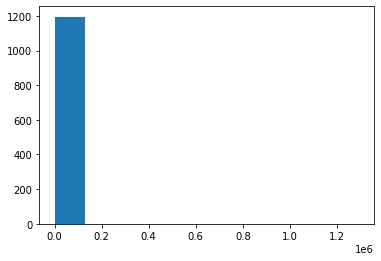

In [34]:
plt.hist(orders['revenue']) 
plt.show()

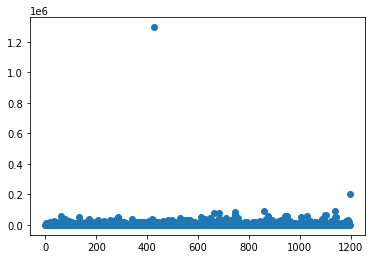

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.show()

**Вывод: абсолютное большество заказов разместились возле нижнего порога, есть несколько выбросов которые искажают картину и их стоит отбросить.**

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [36]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод: всего лишь 5% заказов стоимостью 28000 и 1% - 58233. 
Можно смело отбросить все заказы стоимость выше 28000.**

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

**Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.**

**Сформулируем гипотезы.**
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

**Уровень статистической значимости α = 0.05**

**Для проверки всех нижепредставленных гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.**

In [37]:
#подготовка данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

**Названия столбцов:**
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA  — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [38]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'].
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

**Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.**

In [39]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

**Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.**

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("p-value:")
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print()
print("Различие в среднем кол-ве заказов:")
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value:
0.017

Различие в среднем кол-ве заказов:
0.138


**Вывод:**
- p-value = 0.017 < 0.05 Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.
- Первый вывод говорит о том что трафик поделился между пользователями неккоректно и А/В тест не будет точным.
- Разница между группами составляет 13.8%.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Сформулируем гипотезу:**
- Нулевая гипотеза: различий в среднем чеке между группами А и В нет.
- Альтернативная гипотеза: различия в среднем чеке между группами А и В есть. 

**Уровень статистической значимости α = 0.05**

In [41]:
print("p-value:")
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print()
print("Различие в среднем чеке между группами по 'сырым данным':")
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:
0.729

Различие в среднем чеке между группами по 'сырым данным':
0.259


**Вывод:**

- P-value значительно больше 0.05, получено случайно из-за единичных выбросов.
- Средний чек группы А значительно ниже среднего чека группы В и разница между ними в 25,9%.
- На результат влияют аномальные чеки, нужно делать выводы, удалив аномалии. Проводим тест дальше.

*Если p-значение меньше уровня значимости, то можно отвергнуть нулевую гипотезу, имея доказательства для альтернативы.*

*Если p-значение больше или равно уровню значимости, мы не можем отвергнуть нулевую гипотезу о том, что A и B не отличаются друг от друга.*

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Узнаем, сколько всего аномальных пользователей.**

In [42]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
abnormalUsers_all = abnormalUsers.shape[0]
print()
print(f'Аномальных пользователей: {abnormalUsers_all}')

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

Аномальных пользователей: 74


**Всего 74 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста.**

**Сформулируем гипотезу:**
- Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами А и В нет.
- Альтернативная гипотеза: есть различия в среднем количестве заказов на посетителя. 

In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

*Если p-значение меньше уровня значимости, то можно отвергнуть нулевую гипотезу, имея доказательства для альтернативы.*

*Если p-значение больше или равно уровню значимости, мы не можем отвергнуть нулевую гипотезу о том, что A и B не отличаются друг от друга.*

In [44]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print("p-value:")
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print()
print("Различие в среднем количестве заказов на посетителя")
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value:
0.013

Различие в среднем количестве заказов на посетителя
0.173


**Результаты по среднему количеству заказов практически не изменились.**
- - p-value = 0.013 < 0.05 Нулевую гипотезу о том, различий в среднем количестве заказов на посетителя между группами А и В нет, отвергаем в пользу альтернативной: различия в среднем количестве заказов на посетителя в группе А и В есть. 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Сформулируем гипотезу:**
- Нулевая гипотеза: различий в среднем чеке между группами А и В нет.
- Альтернативная гипотеза: различия в среднем чеке между группами А и В есть. 

In [45]:
print("p-value:")
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print()
print("Различие в среднем чеке между группами А и В:")
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value:
0.738

Различие в среднем чеке между группами А и В:
-0.020


**Вывод:**

- P-value увеличился, но и разница между сегментами сократилась на 23,9%.
- Нулевую гипотезу не отвергаем: различий в среднем чеке между группами А и В нет.
- График различия среднего количества заказов между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению

*Если p-значение меньше уровня значимости, то можно отвергнуть нулевую гипотезу, имея доказательства для альтернативы.*

*Если p-значение больше или равно уровню значимости, мы не можем отвергнуть нулевую гипотезу о том, что A и B не отличаются друг от друга.*

### Решение по результатам теста.

**Остановить тест и считать его успешным. Группа В значительно лучше группы А:**
- Выручка группы В на протяжении всего теста лучше группы А.
- Средний чек на протяжении практически всего теста в группе В лучше.
- Количество заказов на посетителя в группе В больше. Данные графики стабилизированы.
- Нет статистически значимого различия  между сырыми данными и отфильтрованными от аномалий.